# Payment Date Prediction 


### Importing related Libraries 

In [731]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [732]:
import warnings
warnings.filterwarnings('ignore')

### Store the dataset into the Dataframe


In [733]:
df= pd.read_csv("C:/Users/visha/HighRadius/dataset.csv")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


### Check the shape of the dataframe


In [734]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [735]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         50000 non-null  object 
 1   cust_number           50000 non-null  object 
 2   name_customer         50000 non-null  object 
 3   clear_date            40000 non-null  object 
 4   buisness_year         50000 non-null  float64
 5   doc_id                50000 non-null  float64
 6   posting_date          50000 non-null  object 
 7   due_in_date           50000 non-null  float64
 8   baseline_create_date  50000 non-null  float64
 9   cust_payment_terms    50000 non-null  object 
 10  converted_usd         50000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 4.2+ MB


### Display All the column names

In [736]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [737]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [738]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [901]:
percent_missing = df.isnull().sum()*100/len(df)
percent_missing.astype('float')

business_code            0.000000
cust_number              0.000000
name_customer            0.000000
clear_date              19.822273
buisness_year            0.000000
doc_id                   0.000000
posting_date             0.000000
due_in_date              0.000000
baseline_create_date     0.000000
cust_payment_terms       0.000000
converted_usd            0.000000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [740]:
df.filter(['invoice_id','doc_id'])


,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [741]:
if(df['baseline_create_date'].any()==df['document_create_date'].any()==df['document_create_date.1'].any()):
    print("baseline_create_date,document_create_date,document_create_date.1 -these columns are almost same")
else:
    print("not same")

baseline_create_date,document_create_date,document_create_date.1 -these columns are almost same


In [742]:
df.loc[df.duplicated(subset=['baseline_create_date','document_create_date','document_create_date.1'])]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
81,U001,0200761734,H E BUT in,2019-08-07 00:00:00,2019.0,1.929657e+09,2019-07-24,20190724,20190724,20190808.0,USD,RV,1.0,NaN,78043.58,20190724.0,NAA8,1.929657e+09,0
86,U001,0200290370,BARGAIN corporation,2019-09-27 00:00:00,2019.0,1.929854e+09,2019-09-10,20190909,20190910,20190925.0,USD,RV,1.0,NaN,6347.86,20190910.0,NAA8,1.929854e+09,0
113,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930617e+09,2020-03-06,20200306,20200306,20200321.0,USD,RV,1.0,NaN,36.06,20200306.0,NAH4,1.930617e+09,1
124,U001,0200769623,WAL-MAR,2019-10-15 00:00:00,2019.0,1.929929e+09,2019-09-29,20190929,20190929,20191014.0,USD,RV,1.0,NaN,3225.75,20190929.0,NAH4,1.929929e+09,0
127,U001,0200761734,H E BUT trust,2019-11-27 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,11443.14,20191113.0,NAA8,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


#### Please check, Column 'posting_id' is constant columns or not


In [743]:
df['posting_id'].nunique()


1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [744]:
print(df['isOpen'].unique())
print(df['isOpen'].nunique())

[0 1]
2


### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [745]:
df.drop(['area_business','posting_id','invoice_id','document_create_date'
              ,'isOpen','document type','document_create_date.1'],axis=1,inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [746]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         50000 non-null  object 
 1   cust_number           50000 non-null  object 
 2   name_customer         50000 non-null  object 
 3   clear_date            40000 non-null  object 
 4   buisness_year         50000 non-null  float64
 5   doc_id                50000 non-null  float64
 6   posting_date          50000 non-null  object 
 7   due_in_date           50000 non-null  float64
 8   invoice_currency      50000 non-null  object 
 9   total_open_amount     50000 non-null  float64
 10  baseline_create_date  50000 non-null  float64
 11  cust_payment_terms    50000 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.6+ MB


### Show all the Duplicate rows from the dataframe

In [747]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [748]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [749]:
df.drop_duplicates(inplace= True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200506.0,USD,3187.86,20200421.0,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190830.0,USD,6766.54,20190815.0,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200305.0,USD,6120.86,20200219.0,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191212.0,USD,63.48,20191127.0,NAA8


#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [750]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [751]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [752]:
df.isna().sum()


business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

# Data type Conversion 

### Please check the data type of each column of the dataframe

In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         48839 non-null  object 
 1   cust_number           48839 non-null  object 
 2   name_customer         48839 non-null  object 
 3   clear_date            39158 non-null  object 
 4   buisness_year         48839 non-null  float64
 5   doc_id                48839 non-null  float64
 6   posting_date          48839 non-null  object 
 7   due_in_date           48839 non-null  float64
 8   invoice_currency      48839 non-null  object 
 9   total_open_amount     48839 non-null  float64
 10  baseline_create_date  48839 non-null  float64
 11  cust_payment_terms    48839 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.8+ MB


### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [754]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [755]:
df['clear_date']=pd.to_datetime(df['clear_date'])
df['posting_date']= pd.to_datetime(df['posting_date'])
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format="%Y%m%d")

### Please check the datatype of all the columns after conversion of the above 4 columns

In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         48839 non-null  object        
 1   cust_number           48839 non-null  object        
 2   name_customer         48839 non-null  object        
 3   clear_date            39158 non-null  datetime64[ns]
 4   buisness_year         48839 non-null  float64       
 5   doc_id                48839 non-null  float64       
 6   posting_date          48839 non-null  datetime64[ns]
 7   due_in_date           48839 non-null  datetime64[ns]
 8   invoice_currency      48839 non-null  object        
 9   total_open_amount     48839 non-null  float64       
 10  baseline_create_date  48839 non-null  datetime64[ns]
 11  cust_payment_terms    48839 non-null  object        
dtypes: datetime64[ns](4), float64(3), object(5)
memory usage: 4.8+ MB


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [757]:
df['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [758]:
df['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [759]:
conv= df[df['invoice_currency']=='CAD'].total_open_amount * 0.7
df.loc[df['invoice_currency']=="CAD",['total_open_amount']]=conv

In [760]:
df['converted_usd']=df['total_open_amount']

### Display the new "converted_usd" column values

In [761]:
df[['converted_usd']]


,converted_usd
0,54273.28
1,79656.60
2,2253.86
3,2309.79
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [762]:
df['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [763]:
df.drop(['invoice_currency','total_open_amount'],axis=1,inplace=True)

### Write a code to check the number of columns in dataframe

In [902]:
len(df.columns)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [765]:
nan_values = df.isna()
nan_cols = nan_values.any()
cols_with_nan = df.columns[nan_cols].tolist()
print(cols_with_nan)

['clear_date']


#### Find out the number of null values from the column that you got from the above code

In [766]:
df['clear_date'].isnull().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [767]:
nulldata=df.loc[df['clear_date'].isna()]
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


In [768]:
main = df.dropna()
main

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088
...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480


### Check the number of Rows and Columns for both the dataframes 

In [769]:
main.shape

(39158, 11)

In [770]:
nulldata.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [771]:
main.tail(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.40
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.54
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.86
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.48
49999,U001,0200020431,DEC corp,2019-01-15,2019.0,1.928576e+09,2019-01-05,2019-01-24,2019-01-01,NAM4,1790.30


In [772]:
nulldata.tail(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,2020-04-21,NAA8,3187.86


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [773]:
main['Delay']= main['clear_date']-main['due_in_date']
main['Delay']

0        1 days
1       -3 days
2       92 days
4       -3 days
5       61 days
          ...  
49994    0 days
49996    4 days
49997    0 days
49998    0 days
49999   -9 days
Name: Delay, Length: 39158, dtype: timedelta64[ns]

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [774]:
d=main.groupby('name_customer')['Delay'].mean(numeric_only=False)
d


name_customer
11078 us                 17 days 00:00:00
17135 associates       -10 days +00:00:00
17135 llc               -3 days +00:00:00
236008 associates       -3 days +00:00:00
99 CE                     2 days 00:00:00
                              ...        
YEN BROS corp             0 days 00:00:00
YEN BROS corporation    -1 days +12:00:00
YEN BROS llc            -2 days +00:00:00
ZARCO co                -1 days +00:00:00
ZIYAD  us                 6 days 00:00:00
Name: Delay, Length: 3889, dtype: timedelta64[ns]

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [775]:
main['avg_delay']=main['name_customer'].map(d)
main

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-3 days +07:08:49.779837776
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,19 days 00:00:00
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,8 days 02:10:54.545454545
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-3 days +19:33:27.692307693
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,71 days 10:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-1 days +14:45:00
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-3 days +12:40:08.540925267
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,1 days 01:08:34.285714285
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1 days 13:36:42.985074626


In [776]:
 main.loc[main['name_customer']=='WAL-MAR corp'].Delay.sum()/863


Timedelta('-3 days +07:08:49.779837776')

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [777]:
main['avg_delay'] = pd.to_timedelta(main['avg_delay']).view(np.int64) / 1e9
main['avg_delay']

0       -2.334702e+05
1        1.641600e+06
2        6.990545e+05
4       -1.887923e+05
5        6.172800e+06
             ...     
49994   -3.330000e+04
49996   -2.135915e+05
49997    9.051429e+04
49998    1.354030e+05
49999   -3.371478e+05
Name: avg_delay, Length: 39158, dtype: float64

### Display the maindata dataframe 

In [778]:
 main

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-3.330000e+04
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1.354030e+05


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [779]:
main.drop(['Delay','clear_date'],axis=1,inplace=True)
main

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,-2.334702e+05
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,1.641600e+06
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-1.887923e+05
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,-3.330000e+04
49996,U001,0200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,1.354030e+05


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [780]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [781]:
X=main.drop(['avg_delay'],axis=1)
y= main['avg_delay']


In [782]:
X

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088
...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400
49996,U001,0200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540
49997,U001,0200772595,SAFEW associates,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860
49998,U001,0200726979,BJ'S llc,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480


In [783]:
y

0       -2.334702e+05
1        1.641600e+06
2        6.990545e+05
4       -1.887923e+05
5        6.172800e+06
             ...     
49994   -3.330000e+04
49996   -2.135915e+05
49997    9.051429e+04
49998    1.354030e+05
49999   -3.371478e+05
Name: avg_delay, Length: 39158, dtype: float64

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [784]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X,y,test_size=0.4,random_state=1)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [785]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
46683,U001,0200769623,WAL-MAR foundation,2019.0,1.930007e+09,2019-10-13,2019-10-28,2019-10-13,NAH4,38439.450
119,U001,0200772595,SAFEW corporation,2019.0,1.928838e+09,2019-02-21,2019-04-27,2019-02-21,NAGD,2588.650
13099,U001,0200494102,MCCA llc,2019.0,1.929297e+09,2019-05-10,2019-05-26,2019-05-10,C106,48174.000
6451,U001,0200726979,BJ'S corporation,2019.0,1.930248e+09,2019-12-08,2019-12-23,2019-12-08,NAA8,785.990
20492,U001,200759878,SA us,2019.0,1.929093e+09,2019-04-06,2019-04-21,2019-04-06,NAH4,55825.020
...,...,...,...,...,...,...,...,...,...,...
9723,U001,0200769623,WAL-MAR co,2019.0,1.928993e+09,2019-03-20,2019-04-04,2019-03-20,NAH4,56565.370
41318,U001,0200773364,U R M,2019.0,1.929021e+09,2019-03-26,2019-04-10,2019-03-26,NAA8,8710.130
6410,CA02,0140106293,ATLANT corporation,2019.0,2.960528e+09,2019-02-06,2019-02-25,2019-02-15,CA10,9392.642
15221,U001,0200769623,WAL-MAR co,2019.0,1.929908e+09,2019-09-21,2019-10-06,2019-09-21,NAH4,14498.860


In [786]:
 X_loc_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
43745,U001,0200357714,US systems,2019.0,1.929752e+09,2019-08-15,2019-08-30,2019-08-15,NAA8,5775.85
8185,U001,0200786288,FAMILY in,2020.0,1.930559e+09,2020-02-24,2020-03-10,2020-02-24,NAC6,14096.59
19564,U001,0200707822,PUBLI,2019.0,1.929985e+09,2019-10-11,2019-10-26,2019-10-11,NAA8,7317.86
30824,U001,0200331749,SYSC corp,2019.0,1.928625e+09,2019-01-15,2019-01-30,2019-01-15,NAA8,4416.39
19492,U001,0200418007,AM co,2019.0,1.929978e+09,2019-10-11,2019-10-26,2019-10-11,NAA8,3667.55
...,...,...,...,...,...,...,...,...,...,...
30110,CA02,0140105686,SYSC foundation,2019.0,2.960579e+09,2019-09-13,2019-09-24,2019-09-14,CA10,1811.04
40943,CA02,0100021489,CHENS E trust,2019.0,2.960529e+09,2019-02-22,2019-03-05,2019-02-23,CA10,2730.00
23790,U001,0200782001,GORDO in,2019.0,1.929658e+09,2019-07-24,2019-08-08,2019-07-24,NAA8,36148.73
26270,U001,0200803720,DEC llc,2019.0,1.928840e+09,2019-02-22,2019-02-26,2019-02-16,NAM2,7576.29


In [787]:
y_train

46683   -188792.307692
119      112695.652174
13099    172800.000000
6451     133010.526316
20492     37883.076923
             ...      
9723    -213591.459075
41318         0.000000
6410          0.000000
15221   -213591.459075
41947     93046.153846
Name: avg_delay, Length: 23494, dtype: float64

In [788]:
y_loc_test

43745    1.589760e+05
8185    -1.584000e+05
19564    6.377143e+04
30824    9.446400e+05
19492   -3.411692e+05
             ...     
30110    3.249391e+05
40943    4.838400e+06
23790   -5.760000e+04
26270   -3.843692e+05
17781    5.409391e+05
Name: avg_delay, Length: 15664, dtype: float64

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [789]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test,y_loc_test,test_size=0.5,random_state=1)

### Please check for the number of rows and columns of all the 4 dataframes 

In [790]:
X_val

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3808,U001,0200772670,ASSOCIAT llc,2019.0,1.930088e+09,2019-11-01,2019-11-16,2019-11-01,NAU5,35409.65
38357,U001,0200909198,TAP foundation,2019.0,1.929614e+09,2019-07-12,2019-07-27,2019-07-12,NAA8,34800.72
19724,U001,0200762301,C&S WH,2019.0,1.929700e+09,2019-08-05,2019-08-20,2019-08-05,NAC6,20605.46
23744,U001,0200772670,ASSOCIAT corporation,2019.0,1.930043e+09,2019-10-23,2019-11-07,2019-10-23,NAU5,179956.49
23948,U001,0200782001,GORDO co,2020.0,1.930464e+09,2020-02-03,2020-02-18,2020-02-03,NAA8,44336.04
...,...,...,...,...,...,...,...,...,...,...
41472,U001,0200434439,BAUGH SU in,2019.0,1.929767e+09,2019-08-20,2019-09-04,2019-08-20,NAA8,721.77
39417,U001,0200759878,SA corp,2019.0,1.928685e+09,2019-01-26,2019-02-10,2019-01-26,NAH4,26440.34
7645,U001,0200726979,BJ'S co,2019.0,1.929348e+09,2019-05-15,2019-05-30,2019-05-15,NAA8,728.67
5412,U001,0200769623,WAL-MAR us,2019.0,1.930169e+09,2019-11-19,2019-12-04,2019-11-19,NAH4,54966.76


In [791]:
X_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
4842,U001,0200126819,MCLANE in,2020.0,1.930462e+09,2020-02-07,2020-02-22,2020-02-07,NAA8,11747.70
30119,U001,0200900909,SYSCO corp,2019.0,1.929588e+09,2019-07-08,2019-07-23,2019-07-08,NAA8,7379.31
44869,U001,0200704858,WAKE foundation,2019.0,1.929822e+09,2019-09-04,2019-11-08,2019-09-04,NAGD,6547.96
47717,U001,0200769623,WAL-MAR llc,2019.0,1.929379e+09,2019-05-26,2019-06-10,2019-05-26,NAH4,67002.19
27928,U001,0200769623,WAL-MAR foundation,2020.0,1.930440e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,7040.18
...,...,...,...,...,...,...,...,...,...,...
43979,U001,0200797452,US,2019.0,1.928622e+09,2019-01-14,2019-01-29,2019-01-14,NAA8,23675.18
26813,U001,0200706844,WINC us,2020.0,1.930548e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,15814.26
4909,U001,0100001196,DOLLAR in,2019.0,1.930049e+09,2019-10-26,2019-11-10,2019-10-26,NAA8,18127.20
18815,U001,200701314,MBM corporation,2019.0,1.929050e+09,2019-04-03,2019-04-23,2019-04-03,NAD1,8766.72


In [792]:
y_val

3808     200160.000000
38357   -432000.000000
19724    -74482.758621
23744     99600.000000
23948      4320.000000
             ...      
41472     69120.000000
39417     32072.727273
7645     188566.423358
5412    -194557.664234
3913      64800.000000
Name: avg_delay, Length: 7832, dtype: float64

In [793]:
y_test

4842     714763.636364
30119    151200.000000
44869   -435756.521739
47717   -225656.470588
27928   -188792.307692
             ...      
43979    168781.395349
26813    -54400.000000
4909     205200.000000
18815    259200.000000
15099   -205321.957340
Name: avg_delay, Length: 7832, dtype: float64

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

<AxesSubplot:xlabel='avg_delay', ylabel='Density'>

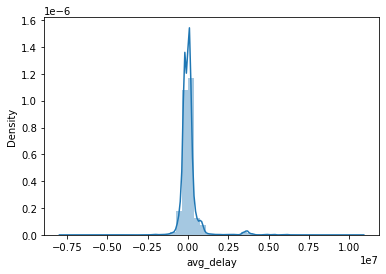

In [794]:
sns.distplot(y_train, kde=True)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [795]:
doc_df =X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()
doc_df

,name_customer,doc_id
0,11078 us,1
1,17135 associates,1
2,99 CE,1
3,99 CE co,1
4,99 CE corporation,2
...,...,...
3051,YEN BROS,1
3052,YEN BROS co,1
3053,YEN BROS corp,1
3054,YEN BROS corporation,1


### You can make another distribution plot of the "doc_id" column from x_train

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

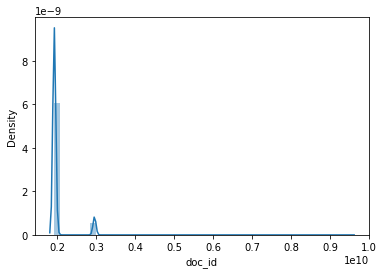

In [796]:
sns.distplot(X_train['doc_id'])

In [797]:
X_train['doc_id']

46683    1.930007e+09
119      1.928838e+09
13099    1.929297e+09
6451     1.930248e+09
20492    1.929093e+09
             ...     
9723     1.928993e+09
41318    1.929021e+09
6410     2.960528e+09
15221    1.929908e+09
41947    1.929350e+09
Name: doc_id, Length: 23494, dtype: float64

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


<AxesSubplot:xlabel='buisness_year', ylabel='Density'>

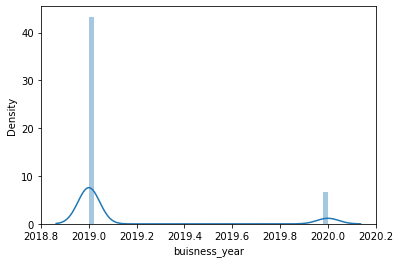

In [798]:
sns.distplot(X_train['buisness_year'])

<AxesSubplot:ylabel='Density'>

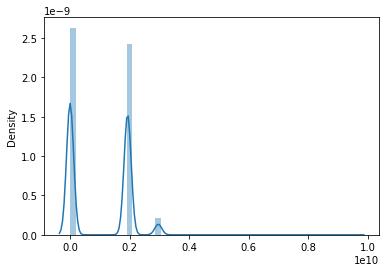

In [799]:
sns.distplot(X_train[['buisness_year','doc_id']])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [800]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
46683,U001,0200769623,WAL-MAR foundation,2019.0,1.930007e+09,2019-10-13,2019-10-28,2019-10-13,NAH4,38439.450
119,U001,0200772595,SAFEW corporation,2019.0,1.928838e+09,2019-02-21,2019-04-27,2019-02-21,NAGD,2588.650
13099,U001,0200494102,MCCA llc,2019.0,1.929297e+09,2019-05-10,2019-05-26,2019-05-10,C106,48174.000
6451,U001,0200726979,BJ'S corporation,2019.0,1.930248e+09,2019-12-08,2019-12-23,2019-12-08,NAA8,785.990
20492,U001,200759878,SA us,2019.0,1.929093e+09,2019-04-06,2019-04-21,2019-04-06,NAH4,55825.020
...,...,...,...,...,...,...,...,...,...,...
9723,U001,0200769623,WAL-MAR co,2019.0,1.928993e+09,2019-03-20,2019-04-04,2019-03-20,NAH4,56565.370
41318,U001,0200773364,U R M,2019.0,1.929021e+09,2019-03-26,2019-04-10,2019-03-26,NAA8,8710.130
6410,CA02,0140106293,ATLANT corporation,2019.0,2.960528e+09,2019-02-06,2019-02-25,2019-02-15,CA10,9392.642
15221,U001,0200769623,WAL-MAR co,2019.0,1.929908e+09,2019-09-21,2019-10-06,2019-09-21,NAH4,14498.860


In [801]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.00000,2.349400e+04,23494.000000
mean,2019.13429,2.013695e+09,30658.212426
std,0.34097,2.841794e+08,36383.634560
min,2019.00000,1.928511e+09,0.790000
25%,2019.00000,1.929182e+09,4537.035000
50%,2019.00000,1.929733e+09,16944.880000
75%,2019.00000,1.930212e+09,45446.867500
max,2020.00000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [802]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [803]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [804]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [805]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
46683,U001,1
119,U001,1
13099,U001,1
6451,U001,1
20492,U001,1
...,...,...
9723,U001,1
41318,U001,1
6410,CA02,0
15221,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [806]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [807]:
X_train ,X_val, X_test = custom(['business_code'])

In [808]:
X_train

,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,business_code_enc
46683,0200769623,WAL-MAR foundation,2019.0,1.930007e+09,2019-10-13,2019-10-28,2019-10-13,NAH4,38439.450,1
119,0200772595,SAFEW corporation,2019.0,1.928838e+09,2019-02-21,2019-04-27,2019-02-21,NAGD,2588.650,1
13099,0200494102,MCCA llc,2019.0,1.929297e+09,2019-05-10,2019-05-26,2019-05-10,C106,48174.000,1
6451,0200726979,BJ'S corporation,2019.0,1.930248e+09,2019-12-08,2019-12-23,2019-12-08,NAA8,785.990,1
20492,200759878,SA us,2019.0,1.929093e+09,2019-04-06,2019-04-21,2019-04-06,NAH4,55825.020,1
...,...,...,...,...,...,...,...,...,...,...
9723,0200769623,WAL-MAR co,2019.0,1.928993e+09,2019-03-20,2019-04-04,2019-03-20,NAH4,56565.370,1
41318,0200773364,U R M,2019.0,1.929021e+09,2019-03-26,2019-04-10,2019-03-26,NAA8,8710.130,1
6410,0140106293,ATLANT corporation,2019.0,2.960528e+09,2019-02-06,2019-02-25,2019-02-15,CA10,9392.642,0
15221,0200769623,WAL-MAR co,2019.0,1.929908e+09,2019-09-21,2019-10-06,2019-09-21,NAH4,14498.860,1


In [809]:
X_val

,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,business_code_enc
3808,0200772670,ASSOCIAT llc,2019.0,1.930088e+09,2019-11-01,2019-11-16,2019-11-01,NAU5,35409.65,1
38357,0200909198,TAP foundation,2019.0,1.929614e+09,2019-07-12,2019-07-27,2019-07-12,NAA8,34800.72,1
19724,0200762301,C&S WH,2019.0,1.929700e+09,2019-08-05,2019-08-20,2019-08-05,NAC6,20605.46,1
23744,0200772670,ASSOCIAT corporation,2019.0,1.930043e+09,2019-10-23,2019-11-07,2019-10-23,NAU5,179956.49,1
23948,0200782001,GORDO co,2020.0,1.930464e+09,2020-02-03,2020-02-18,2020-02-03,NAA8,44336.04,1
...,...,...,...,...,...,...,...,...,...,...
41472,0200434439,BAUGH SU in,2019.0,1.929767e+09,2019-08-20,2019-09-04,2019-08-20,NAA8,721.77,1
39417,0200759878,SA corp,2019.0,1.928685e+09,2019-01-26,2019-02-10,2019-01-26,NAH4,26440.34,1
7645,0200726979,BJ'S co,2019.0,1.929348e+09,2019-05-15,2019-05-30,2019-05-15,NAA8,728.67,1
5412,0200769623,WAL-MAR us,2019.0,1.930169e+09,2019-11-19,2019-12-04,2019-11-19,NAH4,54966.76,1


In [810]:
X_test

,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,business_code_enc
4842,0200126819,MCLANE in,2020.0,1.930462e+09,2020-02-07,2020-02-22,2020-02-07,NAA8,11747.70,1
30119,0200900909,SYSCO corp,2019.0,1.929588e+09,2019-07-08,2019-07-23,2019-07-08,NAA8,7379.31,1
44869,0200704858,WAKE foundation,2019.0,1.929822e+09,2019-09-04,2019-11-08,2019-09-04,NAGD,6547.96,1
47717,0200769623,WAL-MAR llc,2019.0,1.929379e+09,2019-05-26,2019-06-10,2019-05-26,NAH4,67002.19,1
27928,0200769623,WAL-MAR foundation,2020.0,1.930440e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,7040.18,1
...,...,...,...,...,...,...,...,...,...,...
43979,0200797452,US,2019.0,1.928622e+09,2019-01-14,2019-01-29,2019-01-14,NAA8,23675.18,1
26813,0200706844,WINC us,2020.0,1.930548e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,15814.26,1
4909,0100001196,DOLLAR in,2019.0,1.930049e+09,2019-10-26,2019-11-10,2019-10-26,NAA8,18127.20,1
18815,200701314,MBM corporation,2019.0,1.929050e+09,2019-04-03,2019-04-23,2019-04-03,NAD1,8766.72,1


### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [811]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [812]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [813]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [814]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [815]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [816]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [817]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23494 entries, 46683 to 41947
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             23494 non-null  int32         
 1   buisness_year           23494 non-null  float64       
 2   doc_id                  23494 non-null  float64       
 3   posting_date            23494 non-null  datetime64[ns]
 4   due_in_date             23494 non-null  datetime64[ns]
 5   baseline_create_date    23494 non-null  datetime64[ns]
 6   converted_usd           23494 non-null  float64       
 7   business_code_enc       23494 non-null  int32         
 8   name_customer_enc       23494 non-null  int32         
 9   cust_payment_terms_enc  23494 non-null  int32         
dtypes: datetime64[ns](3), float64(3), int32(4)
memory usage: 1.6 MB


In [818]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 4842 to 15099
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             7832 non-null   int32         
 1   buisness_year           7832 non-null   float64       
 2   doc_id                  7832 non-null   float64       
 3   posting_date            7832 non-null   datetime64[ns]
 4   due_in_date             7832 non-null   datetime64[ns]
 5   baseline_create_date    7832 non-null   datetime64[ns]
 6   converted_usd           7832 non-null   float64       
 7   business_code_enc       7832 non-null   int32         
 8   name_customer_enc       7832 non-null   int32         
 9   cust_payment_terms_enc  7832 non-null   int32         
dtypes: datetime64[ns](3), float64(3), int32(4)
memory usage: 550.7 KB


In [819]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 3808 to 3913
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             7832 non-null   int32         
 1   buisness_year           7832 non-null   float64       
 2   doc_id                  7832 non-null   float64       
 3   posting_date            7832 non-null   datetime64[ns]
 4   due_in_date             7832 non-null   datetime64[ns]
 5   baseline_create_date    7832 non-null   datetime64[ns]
 6   converted_usd           7832 non-null   float64       
 7   business_code_enc       7832 non-null   int32         
 8   name_customer_enc       7832 non-null   int32         
 9   cust_payment_terms_enc  7832 non-null   int32         
dtypes: datetime64[ns](3), float64(3), int32(4)
memory usage: 550.7 KB


### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [820]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year


### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [821]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [822]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [823]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [824]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [825]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [826]:
X_train.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [827]:
X_test.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

In [828]:
X_val.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [829]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [830]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [831]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [832]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [833]:
train=X_train.copy()
handling_correlation(train.copy(),threshold=0.85)

['year_of_createdate',
 'year_of_postingdate',
 'month_of_createdate',
 'day_of_createdate',
 'year_of_due',
 'month_of_due']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

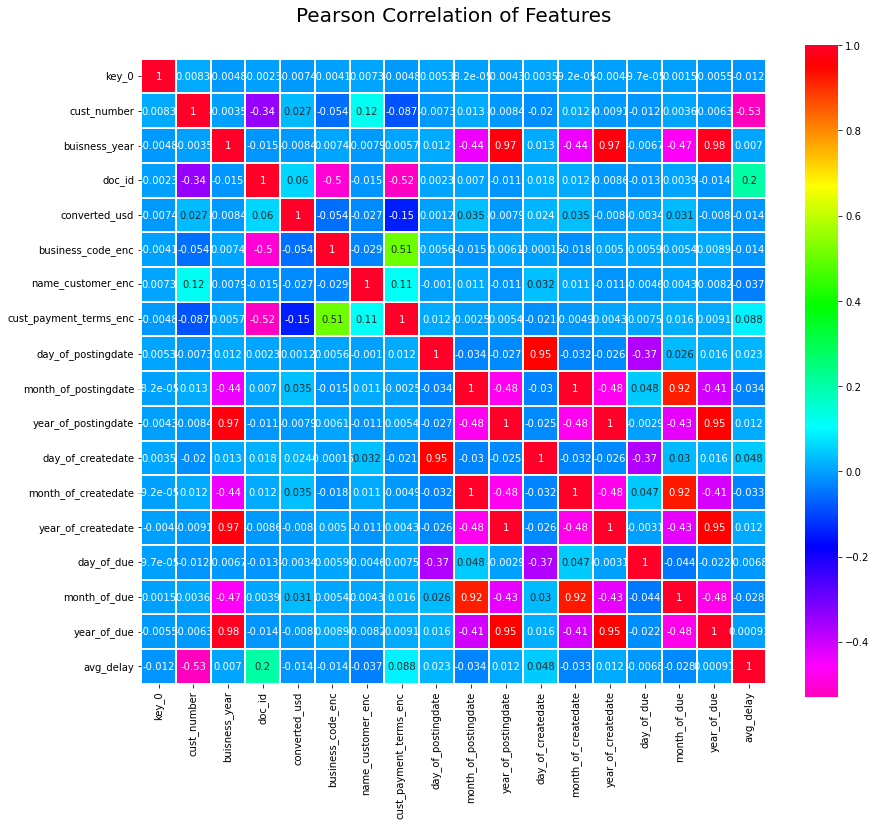

In [834]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [835]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [836]:
sel.variances_

array([1.77833834e+15, 1.16255908e-01, 8.07544916e+16, 1.32371252e+09,
       2.95552036e-01, 1.05154705e+06, 1.42931761e+02, 7.57900109e+01,
       1.22385606e+01, 1.17117448e-01, 7.72866281e+01, 1.22464552e+01,
       1.17244688e-01, 7.62405693e+01, 1.20839720e+01, 1.19220664e-01])

### Important features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [837]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [838]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [839]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [840]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

536143.9420663548

### Display The Comparison Lists

In [841]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[276059697706.7719],[0.3568596683566204],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [842]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
SVR_regressor = SVR()
SVR_regressor.fit(X_train,y_train)
SVR_pred = SVR_regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [843]:
MSE_Score.append(mean_squared_error(y_test, SVR_pred))
R2_Score.append(r2_score(y_test, SVR_pred))

### Check the same for the Validation set also 

In [844]:
predict_test= SVR_regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

658884.2150683586

### Display The Comparison Lists

In [845]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[276059697706.7719, 431871487393.3034],[0.3568596683566204, -0.00613734614922512],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [846]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regression')
DTR_regressor = DecisionTreeRegressor()
DTR_regressor.fit(X_train,y_train)
DTR_pred = DTR_regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [847]:
MSE_Score.append(mean_squared_error(y_test, DTR_pred))
R2_Score.append(r2_score(y_test, DTR_pred))

### Check the same for the Validation set also 

In [848]:
predict_test= DTR_regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

537286.8012582503

### Display The Comparison Lists

In [849]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression'],[276059697706.7719, 431871487393.3034, 240252575947.84195],[0.3568596683566204, -0.00613734614922512, 0.44028004574069723],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [850]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regression')
RF_regressor = RandomForestRegressor()
RF_regressor.fit(X_train,y_train)
RF_pred = RF_regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [851]:
MSE_Score.append(mean_squared_error(y_test, RF_pred))
R2_Score.append(r2_score(y_test, RF_pred))

### Check the same for the Validation set also 

In [852]:
predict_test= RF_regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

355595.7937079903

### Display The Comparison Lists


In [853]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression'],[276059697706.7719, 431871487393.3034, 240252575947.84195, 101543354372.74866],[0.3568596683566204, -0.00613734614922512, 0.44028004574069723, 0.7634329561686368],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [854]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
XGB_regressor = xgb.XGBRegressor()
XGB_regressor.fit(X_train, y_train)
XGB_predicted = XGB_regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [855]:
MSE_Score.append(mean_squared_error(y_test, XGB_predicted))
R2_Score.append(r2_score(y_test, XGB_predicted))

### Check the same for the Validation set also 

In [856]:
predict_test= XGB_regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

333529.90768799244

### Display The Comparison Lists


In [857]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression', 'XGB Regressor'],[276059697706.7719, 431871487393.3034, 240252575947.84195, 101543354372.74866, 87842159567.7938],[0.3568596683566204, -0.00613734614922512, 0.44028004574069723, 0.7634329561686368, 0.7953528309057635],

## You need to make the comparison list into a comparison dataframe 

In [858]:
comp_df=pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)),columns=["Algorithm","MSE_Score","R2_Score"])
comp_df

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.760597e+11,0.356860
1,Support Vector Regression,4.318715e+11,-0.006137
2,Decision Tree Regression,2.402526e+11,0.440280
3,Random Forest Regression,1.015434e+11,0.763433
4,XGB Regressor,8.784216e+10,0.795353


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [859]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [860]:
mean_squared_error(y_test,predictedfinal,squared=False)

296381.78008743015

### Calculate the mean Square Error for validation dataset

In [861]:
mean_squared_error(y_val,predictedfinal,squared=False)

893069.4243377794

### Calculate the R2 score for test

In [862]:
r2_score(y_test,predictedfinal)

0.7953528309057635

### Calculate the R2 score for Validation

In [863]:
r2_score(y_val,predictedfinal)

-0.8493691581928939

### Calculate the Accuracy for train Dataset 

In [864]:
model_accuracy=round(regressorfinal.score(X_train,y_train)*100,2)
print(round(model_accuracy,2),'%')

95.35 %


### Calculate the accuracy for validation

In [865]:
model_accuracy=round(regressorfinal.score(X_val,y_val)*100,2)
print(round(model_accuracy,2),'%')

74.21 %


### Calculate the accuracy for test

In [866]:
model_accuracy=round(regressorfinal.score(X_test,y_test)*100,2)
print(round(model_accuracy,2),'%')

79.54 %


## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [867]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Check for the number of rows and columns in the nulldata

In [868]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [869]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32065.681125
std,0.0,2.673629e+08,35419.613688
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5607.190000
50%,2020.0,1.930731e+09,19024.190000
75%,2020.0,1.930818e+09,47752.640000
max,2020.0,2.960636e+09,653644.800000


### Storing the Nulldata into a different dataset 
# for BACKUP

In [870]:
nulldata1 = nulldata.copy()
nulldata1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [871]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [872]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [873]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] =nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year


nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] =nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] =nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [874]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [875]:
nulldata.dtypes
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,...,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,cust_payment_terms_enc,name_customer_enc
3,CA02,140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,...,3,2020,10,4,2020,31,3,2020,4,2688
7,U001,200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,...,3,2020,3,4,2020,19,3,2020,20,2771
10,U001,200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,...,3,2020,26,3,2020,11,3,2020,20,90
14,U001,200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,...,4,2020,30,4,2020,15,4,2020,20,2012
15,U001,200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,...,4,2020,26,4,2020,16,4,2020,36,718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,...,3,2020,25,3,2020,10,3,2020,34,2965
49980,U001,200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,...,5,2020,18,5,2020,3,5,2020,34,2963
49982,U001,200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,...,3,2020,26,3,2020,11,3,2020,20,793
49992,U001,200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,...,3,2020,9,4,2020,25,3,2020,20,2737


### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [876]:
nulldata.drop(columns=['business_code',
 "baseline_create_date",
 "due_in_date",
 "posting_date",
 "name_customer",
 "clear_date",
 "cust_payment_terms",
 'day_of_cleardate',
 "month_of_cleardate",
 "year_of_cleardate"],axis=1,inplace=True)

### Check the information of the "nulldata" dataframe

In [877]:
nulldata

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,cust_payment_terms_enc,name_customer_enc
3,140105686,2020.0,2.960623e+09,2309.79,67,30,3,2020,10,4,2020,31,3,2020,4,2688
7,200744019,2020.0,1.930659e+09,11173.02,67,19,3,2020,3,4,2020,19,3,2020,20,2771
10,200418007,2020.0,1.930611e+09,3525.59,67,11,3,2020,26,3,2020,11,3,2020,20,90
14,200739534,2020.0,1.930788e+09,121105.65,67,15,4,2020,30,4,2020,15,4,2020,20,2012
15,200353024,2020.0,1.930817e+09,3726.06,67,23,4,2020,26,4,2020,16,4,2020,36,718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,13114.99,67,10,3,2020,25,3,2020,10,3,2020,34,2965
49980,200769623,2020.0,1.930851e+09,8899.71,67,3,5,2020,18,5,2020,3,5,2020,34,2963
49982,200148860,2020.0,1.930638e+09,4967.06,67,11,3,2020,26,3,2020,11,3,2020,20,793
49992,200900909,2020.0,1.930702e+09,1998.64,67,25,3,2020,9,4,2020,25,3,2020,20,2737


### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [878]:
print(nulldata.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [879]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [880]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [881]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [882]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2309.79,67,2688,4,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,11173.02,67,2771,20,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,3525.59,67,90,20,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,121105.65,67,2012,20,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,3726.06,67,718,36,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,13114.99,67,2965,34,10,3,2020,10,3,2020,25,3,2020
49980,200769623,2020.0,1.930851e+09,8899.71,67,2963,34,3,5,2020,3,5,2020,18,5,2020
49982,200148860,2020.0,1.930638e+09,4967.06,67,793,20,11,3,2020,11,3,2020,26,3,2020
49992,200900909,2020.0,1.930702e+09,1998.64,67,2737,20,25,3,2020,25,3,2020,9,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [883]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [884]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

# final_result

In [885]:
final_result= pd.DataFrame(data=final_result)
final_result

,avg_delay
0,6.486564e+05
1,3.374096e+05
2,1.082230e+06
3,4.755133e+05
4,-3.003025e+05
...,...
9676,7.701648e+04
9677,7.836192e+04
9678,-1.291379e+05
9679,2.953922e+05


In [886]:
nulldata1.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')

# Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [887]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata2.index )

### Display the "Final" dataframe 

In [888]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,6.486564e+05
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,3.374096e+05
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,1.082230e+06
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,4.755133e+05
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-3.003025e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,7.701648e+04
9677,49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,7.836192e+04
9678,49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,-1.291379e+05
9679,49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,2.953922e+05


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [889]:
Final.shape

(9681, 13)

In [890]:
Final.columns
Final.dtypes

key_0                            int64
business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
cust_payment_terms              object
converted_usd                  float64
avg_delay                      float32
dtype: object

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [891]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [892]:
Final['clear_date']

0      2020-04-17 12:10:56.375000000
1      2020-04-06 21:43:29.593750000
2      2020-04-07 12:37:10.500000000
3      2020-05-05 12:05:13.281250000
4      2020-04-22 12:34:57.531250000
                    ...             
9676   2020-03-25 21:23:36.476562500
9677   2020-05-18 21:46:01.921875000
9678   2020-03-24 12:07:42.125000000
9679   2020-04-12 10:03:12.250000000
9680   2020-05-06 07:40:39.251953125
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [893]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [894]:
Final['avg_delay']

0        7.0
1        3.0
2       12.0
3        5.0
4       -4.0
        ... 
9676     0.0
9677     0.0
9678    -2.0
9679     3.0
9680     0.0
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [895]:

bins= [0,15,30,45,60,100]
labels =['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [896]:
Final.drop(['key_0','avg_delay'],axis=1,inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [897]:
Final['Aging Bucket'].value_counts()

0-15               8237
16-30               205
31-45                93
46-60                 9
Greatar than 60       3
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [898]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-17 12:10:56.375000000,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0-15
1,U001,0200744019,TARG us,2020-04-06 21:43:29.593750000,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,0-15
2,U001,0200418007,AM,2020-04-07 12:37:10.500000000,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,0-15
3,U001,0200739534,OK systems,2020-05-05 12:05:13.281250000,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,0-15
4,U001,0200353024,DECA corporation,2020-04-22 12:34:57.531250000,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200769623,WAL-MAR in,2020-03-25 21:23:36.476562500,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,0-15
9677,U001,0200769623,WAL-MAR corporation,2020-05-18 21:46:01.921875000,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,0-15
9678,U001,0200148860,DOLLA co,2020-03-24 12:07:42.125000000,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,NaN
9679,U001,0200900909,SYSCO co,2020-04-12 10:03:12.250000000,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,0-15


### Store this dataframe into the .csv format

In [900]:
Final.to_csv('HRC70460W_Vishal_Magar1.csv',date_format='%Y-%m-%d')

# END OF THE PROJECT